In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digitData=load_digits()
dir(digitData)


['DESCR', 'data', 'images', 'target', 'target_names']

In [49]:
digitData.data[0].shape

(64,)

<Figure size 432x288 with 0 Axes>

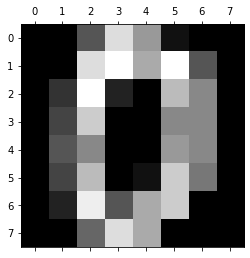

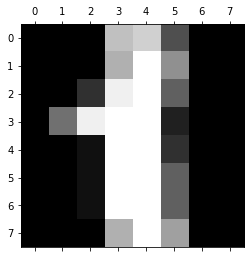

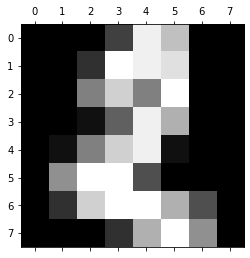

In [50]:
plt.gray()
for i in range(3):
  plt.matshow(digitData.images[i])

In [51]:
digitData.target[0:5]

array([0, 1, 2, 3, 4])

In [52]:
from sklearn.model_selection import train_test_split
xt,xtest,yt,ytest=train_test_split(digitData.data, digitData.target, test_size=.2)
len(xtest)

360

In [53]:
from sklearn import linear_model


In [54]:
model=linear_model.LogisticRegressionCV(max_iter=10000)
model.fit(xt,yt)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=10000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [55]:
model.predict(xtest)
model.score(xtest,ytest)

0.9694444444444444

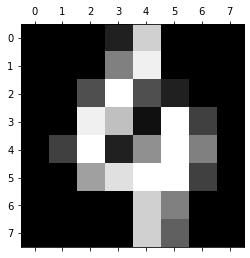

In [56]:
plt.matshow(digitData.images[100])

In [57]:
digitData.target[100]

4

In [58]:
model.predict([digitData.data[100]])

array([4])

In [59]:
model.predict(digitData.data[100:103])

array([4, 0, 5])

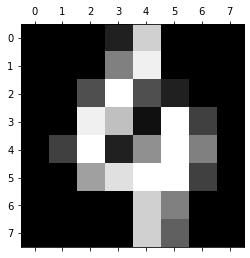

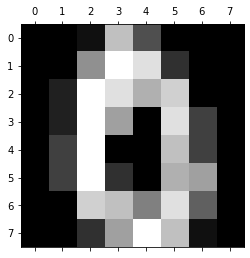

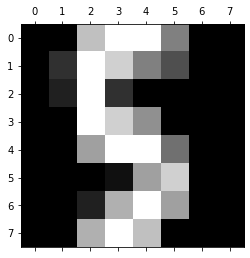

In [60]:
for i in range(100,103):
  plt.matshow(digitData.images[i])

In [61]:
y_predicted=model.predict(xtest)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 41]])

# **Show Confusion Matrix**

Text(69.0, 0.5, 'Truth')

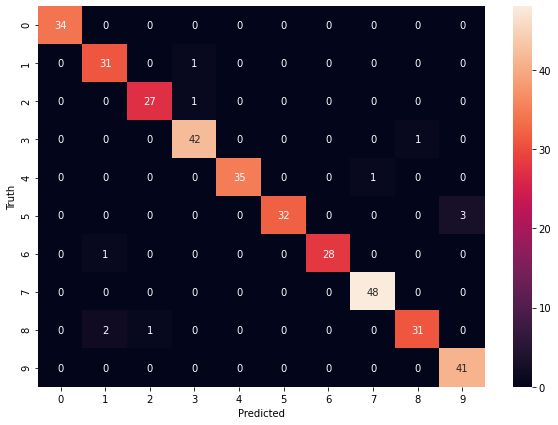

In [62]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')